In [ ]:
# Bibliotecas de Sistema e Gerenciamento de Arquivos
import os  # Manipulação de caminhos de arquivos
# from google.colab import files  # Upload de arquivos no Google Colab
import math  # Funções matemáticas (ex.: logaritmos, arredondamentos)

# Processamento de Linguagem Natural
import nltk  # Tokenização, stopwords, manipulação de texto
import string  # Manipulação de strings e pontuações
from nltk.tokenize import word_tokenize  # Tokenização de texto
from nltk.corpus import stopwords  # Stopwords em múltiplos idiomas


# Baixar os recursos necessários do NLTK
nltk.download('punkt')
nltk.download('stopwords')
# Definir a lista de stopwords para o idioma desejado (por exemplo, 'portuguese' ou 'english')
stop_words = set(stopwords.words('portuguese'))

# Manipulação de Dados
import pandas as pd

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Vetorização de Texto e Similaridade
from sklearn.feature_extraction.text import CountVectorizer # Vetorização com Bag of Words (BoW)
from sklearn.feature_extraction.text import TfidfVectorizer  # Vetorização com TF-IDF
from sklearn.metrics.pairwise import cosine_similarity  # Cálculo de similaridade cosseno


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


O código a seguir executa o upload de arquivos de texto para o ambiente do Google Colab, processa os dados e os organiza em um DataFrame para análise posterior.

1. **Etapa 1: Upload dos arquivos**
   - A função `files.upload()` permite que o usuário faça o upload de um ou mais arquivos para o Colab. Esses arquivos são armazenados em um dicionário, onde a chave é o nome do arquivo e o valor é o conteúdo do arquivo.

2. **Criação de listas para armazenar os dados**
   - Duas listas são criadas: `documentos`, que armazenará os nomes dos arquivos, e `textos_brutos`, que armazenará o conteúdo textual de cada arquivo.

3. **Etapa 2: Iteração pelos arquivos**
   - O código itera sobre os arquivos carregados, acessando o nome de cada arquivo e seu caminho completo no diretório de trabalho (`/content/`).
   - Em seguida, o conteúdo de cada arquivo é lido e armazenado na lista `textos_brutos`, enquanto o nome do arquivo é adicionado à lista `documentos`.

4. **Etapa 3: Criação do DataFrame**
   - Um DataFrame do `pandas` é criado com duas colunas: `documento`, que contém o nome dos arquivos, e `texto_bruto`, que contém o texto extraído de cada arquivo. Esse DataFrame organiza os dados de forma estruturada para facilitar a manipulação e análise subsequente.
   
5. **Visualização do DataFrame**
   - Por fim, o DataFrame criado é exibido para o usuário verificar a estrutura dos dados.


In [ ]:
# Etapa 1: Upload dos arquivos
uploaded = files.upload()

Saving plano egídio.txt to plano egídio (1).txt
Saving plano ricardo alba.txt to plano ricardo alba (1).txt
Saving plano rosane.txt to plano rosane (1).txt
Saving plano tramontin.txt to plano tramontin (1).txt
Saving planos ana paula.txt to planos ana paula (1).txt


In [62]:
uol_news = pd.read_csv('uol_news_data.csv', sep=';', encoding='utf-8-sig')
pd.set_option('display.max_rows', 150)

# Etapa 3: Criar o DataFrame
df = pd.DataFrame({
    'documento': uol_news['title'][0:11],
    'texto_bruto': uol_news['content'][0:11]
})

df = df.dropna(subset=['texto_bruto'])

# Visualizar o DataFrame
df

,documento,texto_bruto
0,Guia que se masturbou durante mergulho com tur...,Um guia de turismo foi preso na manhã desta qu...
1,Cidade de São Paulo terá queda de temperatura ...,A temperatura deve despencar até 22°C na cidad...
2,Mega-Sena acumula e prêmio sobe para R$ 33 mil...,Ninguém acertou as seis dezenas sorteadas hoje...
3,Mal cabe na palma da mão: diamante de 2.492 qu...,Um dos maiores diamantes já encontrados até ho...
4,Energia é retomada no Acre e em Rondônia após ...,O ONS (Operador Nacional do Sistema Elétrico) ...
5,Moraes manda PF apreender celular de ex-assess...,O ministro do STF (Supremo Tribunal Federal) A...
6,Manual da Voepass impede comissários de regist...,A Anac (Agência Nacional de Aviação Civil) ide...
7,"'Muita água para rolar', diz candidato em Guar...",O candidato à Prefeitura de Guarulhos Lucas Sa...
8,"Congresso promulga PEC da Anistia, com cota de...",O Congresso Nacional promulgou nesta quinta-fe...
9,"'STF não pode ser protagonista da lei', diz re...",Designado relator da proposta de emenda à Cons...


Este conjunto de funções realiza o pré-processamento de textos para transformá-los em uma forma mais limpa e adequada para análise. A seguir está a descrição de cada função e seu papel no processo:

1. **Função 1: Normalização (`normalize_text`)**
   - Transforma todo o texto em letras minúsculas usando o método `lower()`. Isso é importante para garantir que palavras maiúsculas e minúsculas sejam tratadas como equivalentes durante a análise.

2. **Função 2: Tokenização (`tokenize_text`)**
   - Divide o texto em unidades menores chamadas *tokens* (geralmente palavras), utilizando a função `word_tokenize` do NLTK. A tokenização facilita o processamento subsequente ao isolar palavras individuais.

3. **Função 3: Remoção de Pontuação (`remove_punctuation`)**
   - Remove todos os tokens que não são alfanuméricos (ou seja, pontuação e caracteres especiais), mantendo apenas palavras e números, com o método `isalnum()`.

4. **Função 4: Remoção de Stopwords (`remove_stopwords`)**
   - Remove *stopwords*, que são palavras comuns (como "e", "de", "o") que geralmente não contribuem muito para o significado do texto. A lista de stopwords é fornecida pelo NLTK.

5. **Função 5: Remoção de Números (`remove_numbers`)**
   - Exclui tokens que consistem apenas de números. Em muitos casos, números não são relevantes para a análise semântica do texto.

6. **Função para Juntar Tokens (`join_tokens`)**
   - Junta novamente os tokens processados em uma única string, separando-os por espaços, para que possam ser usados de forma concatenada em etapas subsequentes de análise.

### Função de Processamento Completo (`process_text`)

- Esta função aplica as etapas de pré-processamento de forma sequencial:
  1. Normaliza o texto (minúsculas).
  2. Tokeniza o texto.
  3. Remove pontuação.
  4. Remove *stopwords*.
  5. Remove números.
  6. Junta os tokens resultantes em uma string limpa.
  
- O processamento é aplicado progressivamente ao texto, retornando a versão final pronta para análise ou modelagem.


In [63]:
# Função 1: Normalização (lowercase)
def normalize_text(text):
    return str(text).lower()

# Função 2: Tokenização
def tokenize_text(text):
    return word_tokenize(text)

# Função 3: Remoção de pontuação
def remove_punctuation(tokens):
    return [word for word in tokens if word.isalnum()]

# Função 4: Remoção de stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Função 5: Remoção de números
def remove_numbers(tokens):
    return [word for word in tokens if not word.isdigit()]

# Função para juntar tokens processados em uma única string
def join_tokens(tokens):
    return ' '.join(tokens)

# Aplicando o processamento progressivamente ao DataFrame
def process_text(text):
    # Passo 1: Normalizar
    text = normalize_text(text)

    # Passo 2: Tokenizar
    tokens = tokenize_text(text)

    # Passo 3: Remover pontuação
    tokens = remove_punctuation(tokens)

    # Passo 4: Remover stopwords
    tokens = remove_stopwords(tokens)

    # Passo 5: Remover números (implementado após as outras etapas)
    tokens = remove_numbers(tokens)

    # Juntar os tokens processados
    return join_tokens(tokens)

In [64]:
# Aplicar o processamento a cada texto no DataFrame
df['texto_processado'] = df['texto_bruto'].apply(process_text)

# Visualizar o DataFrame com a nova coluna
df.head()


,documento,texto_bruto,texto_processado
0,Guia que se masturbou durante mergulho com tur...,Um guia de turismo foi preso na manhã desta qu...,guia turismo preso manhã desta gravado masturb...
1,Cidade de São Paulo terá queda de temperatura ...,A temperatura deve despencar até 22°C na cidad...,temperatura deve despencar cidade paulo apenas...
2,Mega-Sena acumula e prêmio sobe para R$ 33 mil...,Ninguém acertou as seis dezenas sorteadas hoje...,ninguém acertou seis dezenas sorteadas hoje co...
3,Mal cabe na palma da mão: diamante de 2.492 qu...,Um dos maiores diamantes já encontrados até ho...,maiores diamantes encontrados hoje quilates ma...
4,Energia é retomada no Acre e em Rondônia após ...,O ONS (Operador Nacional do Sistema Elétrico) ...,ons operador nacional sistema elétrico confirm...


###  Salvamento e Recarregamento de Dados Processados

Esse código implementa uma estratégia para evitar a repetição desnecessária de tarefas de pré-processamento de texto, utilizando um "breakpoint" manual através do salvamento e recarregamento dos dados já processados em um arquivo CSV.

In [65]:
# Caminho de saída para o arquivo CSV
output_file_csv = '/content/textos_processados.csv'

# Salvando o DataFrame no formato CSV
df.to_csv(output_file_csv, index=False, encoding='utf-8')

print(f"Arquivo CSV salvo em: {output_file_csv}")


Arquivo CSV salvo em: /content/textos_processados.csv


In [66]:
# Caminho do arquivo CSV gerado anteriormente
csv_file_path = '/content/textos_processados.csv'

# Leitura do arquivo CSV para um DataFrame
df = pd.read_csv(csv_file_path)

# Exibir as primeiras linhas do DataFrame carregado
df

,documento,texto_bruto,texto_processado
0,Guia que se masturbou durante mergulho com tur...,Um guia de turismo foi preso na manhã desta qu...,guia turismo preso manhã desta gravado masturb...
1,Cidade de São Paulo terá queda de temperatura ...,A temperatura deve despencar até 22°C na cidad...,temperatura deve despencar cidade paulo apenas...
2,Mega-Sena acumula e prêmio sobe para R$ 33 mil...,Ninguém acertou as seis dezenas sorteadas hoje...,ninguém acertou seis dezenas sorteadas hoje co...
3,Mal cabe na palma da mão: diamante de 2.492 qu...,Um dos maiores diamantes já encontrados até ho...,maiores diamantes encontrados hoje quilates ma...
4,Energia é retomada no Acre e em Rondônia após ...,O ONS (Operador Nacional do Sistema Elétrico) ...,ons operador nacional sistema elétrico confirm...
5,Moraes manda PF apreender celular de ex-assess...,O ministro do STF (Supremo Tribunal Federal) A...,ministro stf supremo tribunal federal alexandr...
6,Manual da Voepass impede comissários de regist...,A Anac (Agência Nacional de Aviação Civil) ide...,anac agência nacional aviação civil identifico...
7,"'Muita água para rolar', diz candidato em Guar...",O candidato à Prefeitura de Guarulhos Lucas Sa...,candidato prefeitura guarulhos lucas sanches p...
8,"Congresso promulga PEC da Anistia, com cota de...",O Congresso Nacional promulgou nesta quinta-fe...,congresso nacional promulgou nesta emenda cons...
9,"'STF não pode ser protagonista da lei', diz re...",Designado relator da proposta de emenda à Cons...,designado relator proposta emenda constituição...


In [67]:
# Eliminar a coluna 'texto_bruto' do DataFrame
df = df.drop(columns=['texto_bruto'])

df

,documento,texto_processado
0,Guia que se masturbou durante mergulho com tur...,guia turismo preso manhã desta gravado masturb...
1,Cidade de São Paulo terá queda de temperatura ...,temperatura deve despencar cidade paulo apenas...
2,Mega-Sena acumula e prêmio sobe para R$ 33 mil...,ninguém acertou seis dezenas sorteadas hoje co...
3,Mal cabe na palma da mão: diamante de 2.492 qu...,maiores diamantes encontrados hoje quilates ma...
4,Energia é retomada no Acre e em Rondônia após ...,ons operador nacional sistema elétrico confirm...
5,Moraes manda PF apreender celular de ex-assess...,ministro stf supremo tribunal federal alexandr...
6,Manual da Voepass impede comissários de regist...,anac agência nacional aviação civil identifico...
7,"'Muita água para rolar', diz candidato em Guar...",candidato prefeitura guarulhos lucas sanches p...
8,"Congresso promulga PEC da Anistia, com cota de...",congresso nacional promulgou nesta emenda cons...
9,"'STF não pode ser protagonista da lei', diz re...",designado relator proposta emenda constituição...


# Vetorização dos tokens (Bag of Words ou TF-IDF)

Agora que temos apenas a coluna ['texto_processado'] (que contém o texto limpo e processado), podemos realizar a vetorização. Inicialmente, vamos usar o método Bag of Words para ilustrar o processo de vetorização.

**Vetorização com Bag of Words:**
Usaremos o CountVectorizer da biblioteca scikit-learn para transformar os textos em vetores de contagem de palavras (Bag of Words).

In [68]:
df


,documento,texto_processado
0,Guia que se masturbou durante mergulho com tur...,guia turismo preso manhã desta gravado masturb...
1,Cidade de São Paulo terá queda de temperatura ...,temperatura deve despencar cidade paulo apenas...
2,Mega-Sena acumula e prêmio sobe para R$ 33 mil...,ninguém acertou seis dezenas sorteadas hoje co...
3,Mal cabe na palma da mão: diamante de 2.492 qu...,maiores diamantes encontrados hoje quilates ma...
4,Energia é retomada no Acre e em Rondônia após ...,ons operador nacional sistema elétrico confirm...
5,Moraes manda PF apreender celular de ex-assess...,ministro stf supremo tribunal federal alexandr...
6,Manual da Voepass impede comissários de regist...,anac agência nacional aviação civil identifico...
7,"'Muita água para rolar', diz candidato em Guar...",candidato prefeitura guarulhos lucas sanches p...
8,"Congresso promulga PEC da Anistia, com cota de...",congresso nacional promulgou nesta emenda cons...
9,"'STF não pode ser protagonista da lei', diz re...",designado relator proposta emenda constituição...


In [69]:
# Instanciar o CountVectorizer
vectorizer = CountVectorizer()

#texto_sem_nan = [doc for doc in df['texto_processado'] if doc is not np.nan]

# Aplicar a vetorização ao texto processado
X_bag_of_words = vectorizer.fit_transform(df['texto_processado'])

# Converter a matriz esparsa resultante para um DataFrame
df_bag_of_words = pd.DataFrame(X_bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

# Definir a coluna 'documento' como índice do DataFrame
df_bag_of_words.index = df['documento']


# Exibir as primeiras linhas do DataFrame vetorizado com 'documento' como índice
df_bag_of_words



,16h47,18h30,19h,20h40,22ºc,23ºc,37ºc,5º,abastece,abastecer,...,época,êxtase,índice,órgão,órgãos,última,último,últimos,única,único
documento,,,,,,,,,,,,,,,,,,,,,
Guia que se masturbou durante mergulho com turista em Maragogi é preso,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Cidade de São Paulo terá queda de temperatura de até 22ºC em 48 horas,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,1,0,0
Mega-Sena acumula e prêmio sobe para R$ 33 milhões; veja dezenas sorteadas,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mal cabe na palma da mão: diamante de 2.492 quilates é encontrado em Botsuana,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
"Energia é retomada no Acre e em Rondônia após quase 4 h de apagão, diz ONS",1,0,0,1,1,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Moraes manda PF apreender celular de ex-assessor após mensagens vazadas,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
Manual da Voepass impede comissários de registrarem falhas nas aeronaves,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
"'Muita água para rolar', diz candidato em Guarulhos preterido por Bolsonaro",0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
"Congresso promulga PEC da Anistia, com cota de 30% de recursos para candidatos negros",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Neste código, visualizamos a quantidade total de tokens por documento após aplicar o método `CountVectorizer` da biblioteca `scikit-learn`. Primeiro, configuramos o estilo do gráfico com `Seaborn` para ter uma grade branca e usamos a paleta de cores 'viridis'. Em seguida, somamos os tokens de cada documento no DataFrame de Bag of Words (`df_bag_of_words`), resultando no total de tokens por documento. Criamos um novo DataFrame `df_total_tokens` com essa soma e ordenamos os documentos em ordem decrescente de tokens.

Usamos a função `sns.barplot` para gerar um gráfico de barras, onde o eixo X representa os documentos e o eixo Y o total de tokens. Adicionamos os valores de cada barra diretamente no gráfico para facilitar a interpretação visual. Por fim, ajustamos o título, rótulos e rotacionamos os nomes dos documentos no eixo X para melhorar a legibilidade.


<ipython-input-72-8f5d538dae35>:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


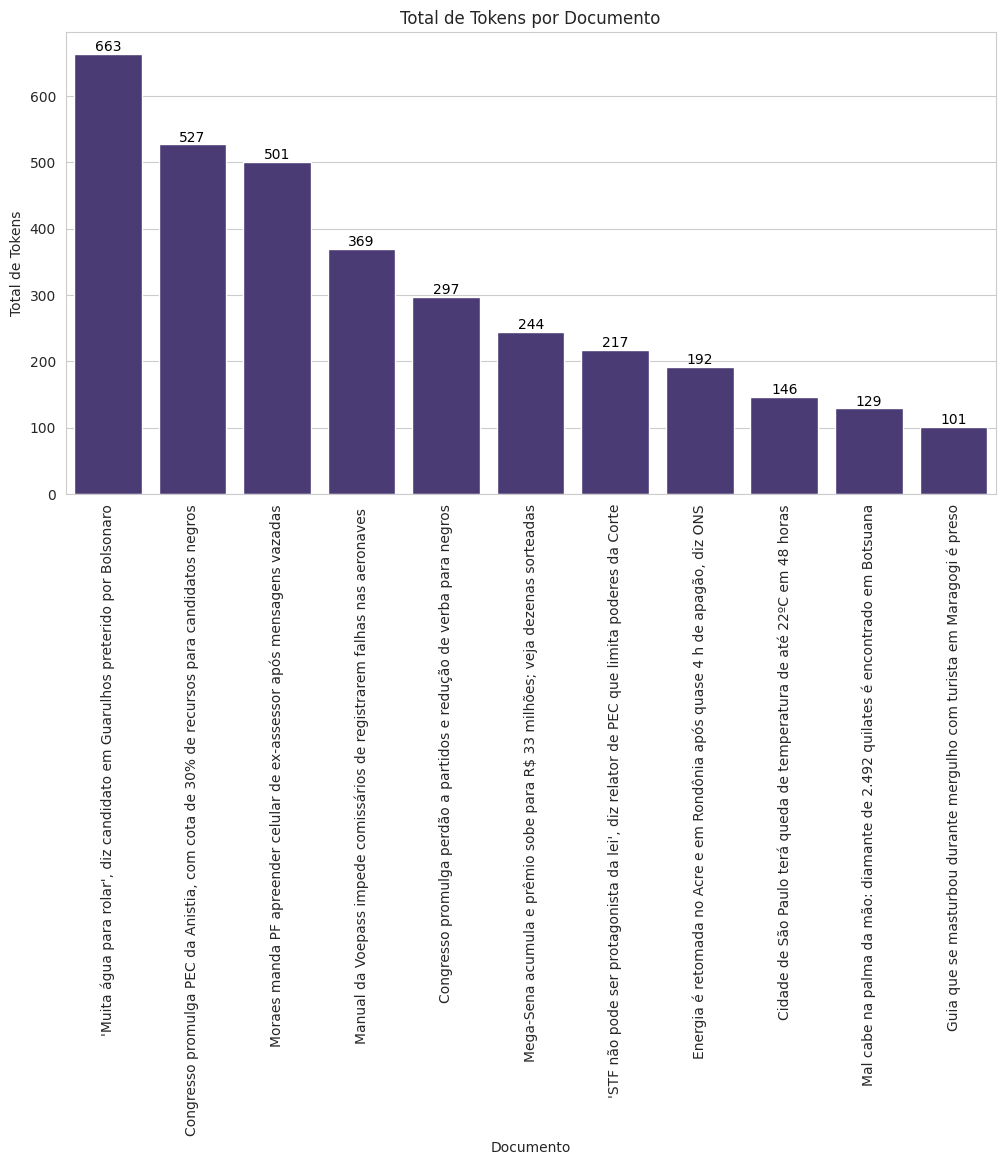

In [72]:
# Configurações de estilo e paleta de cores
sns.set_style("whitegrid")  # Estilo de grade branca
sns.set_palette("viridis")  # Paleta de cores 'viridis'

# Passo 1: Calcular o total de tokens em cada documento
total_tokens = df_bag_of_words.sum(axis=1)

# Criar um DataFrame para facilitar a plotagem
df_total_tokens = total_tokens.reset_index()
df_total_tokens.columns = ['Documento', 'Total de Tokens']

# Ordenar os documentos pela frequência de tokens em ordem decrescente
df_total_tokens = df_total_tokens.sort_values(by='Total de Tokens', ascending=False)

# Visualização do total de tokens por documento
plt.figure(figsize=(12,6))
barplot = sns.barplot(x='Documento', y='Total de Tokens', data=df_total_tokens)

# Adicionar os valores no topo das barras
for index, row in enumerate(df_total_tokens['Total de Tokens']):
    barplot.text(index, row, f'{int(row)}', color='black', ha="center", va="bottom")

# Ajustes de título e rótulos
plt.title('Total de Tokens por Documento')
plt.xlabel('Documento')
plt.ylabel('Total de Tokens')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X para melhor legibilidade
plt.tight_layout()

# Exibir o gráfico
plt.show()



Este cálculo é a chave para medir a riqueza do vocabulário de cada documento. A riqueza do vocabulário é definida como a proporção entre o número de palavras únicas e o número total de palavras (tokens). Valores próximos de 1 indicam que quase todas as palavras no documento são únicas (ou seja, o vocabulário é mais variado), enquanto valores mais próximos de 0 indicam que há muita repetição de palavras.

<ipython-input-74-adbf0dca052f>:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


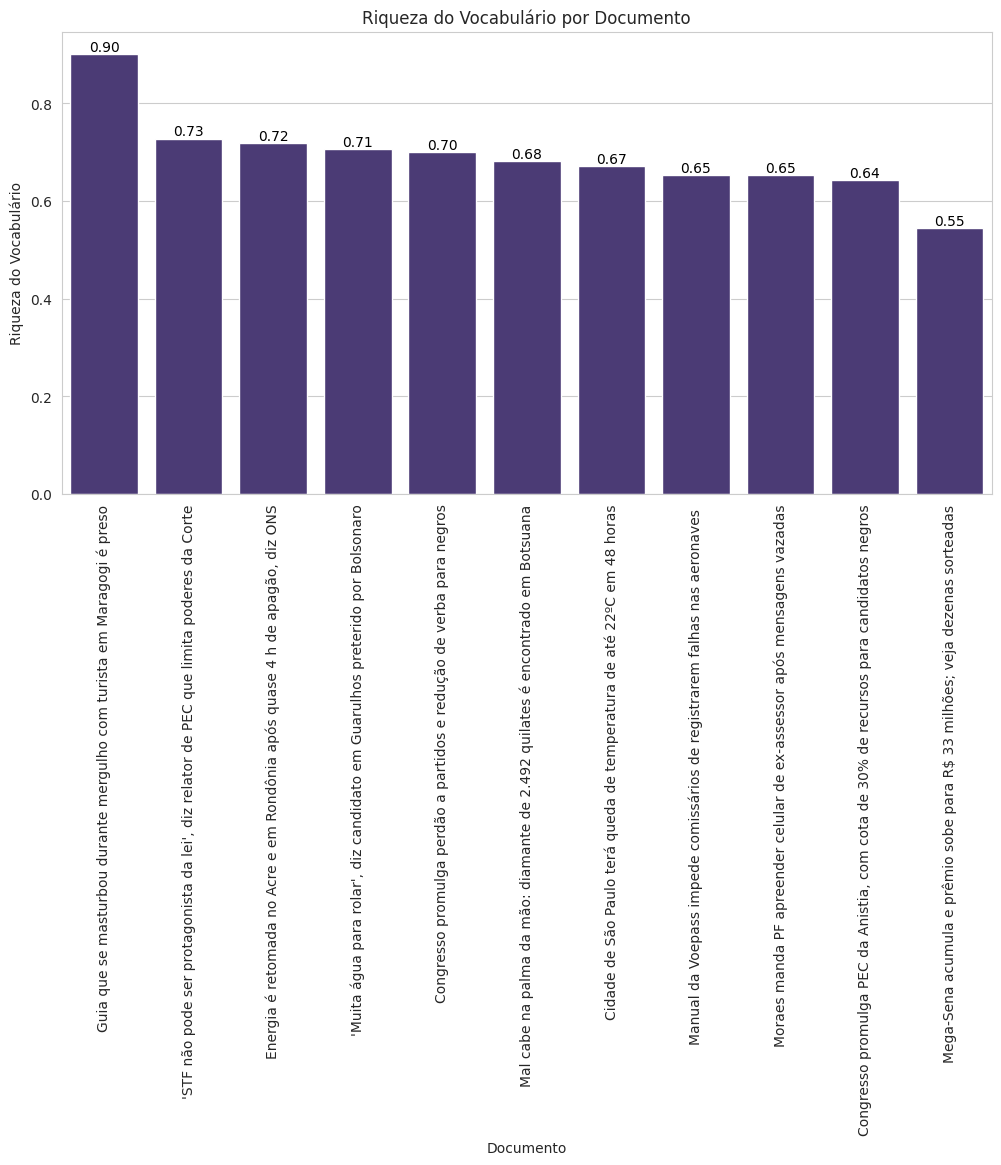

In [74]:
# Passo 1: Calcular o total de tokens (palavras) em cada documento
total_tokens = df_bag_of_words.sum(axis=1)

# Passo 2: Calcular o número de palavras únicas (não repetidas) em cada documento
unique_tokens = df_bag_of_words[df_bag_of_words > 0].count(axis=1)

# Passo 3: Calcular a riqueza do vocabulário (proporção de palavras únicas / total de palavras)
vocabulary_richness = unique_tokens / total_tokens

# Criar um DataFrame para facilitar a plotagem
df_richness = vocabulary_richness.reset_index()
df_richness.columns = ['Documento', 'Riqueza do Vocabulário']

# Ordenar os documentos pela riqueza do vocabulário em ordem decrescente
df_richness = df_richness.sort_values(by='Riqueza do Vocabulário', ascending=False)

# Visualizar a riqueza do vocabulário por documento
plt.figure(figsize=(12,6))
barplot = sns.barplot(x='Documento', y='Riqueza do Vocabulário', data=df_richness)

# Adicionar os valores no topo das barras
for index, row in enumerate(df_richness['Riqueza do Vocabulário']):
    barplot.text(index, row, f'{row:.2f}', color='black', ha="center", va="bottom")

# Ajustes de título e rótulos
plt.title('Riqueza do Vocabulário por Documento')
plt.xlabel('Documento')
plt.ylabel('Riqueza do Vocabulário')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X para melhor legibilidade
plt.tight_layout()

# Exibir o gráfico
plt.show()


Abaixo, a função `get_top_tokens` retorna um DataFrame com os *top N* tokens mais frequentes para cada documento.

### Parâmetros:
- `df (pd.DataFrame)`: DataFrame contendo tokens como colunas e documentos como linhas (geralmente vindo de uma matriz Bag of Words).
- `top_n (int)`: Número de tokens mais frequentes a serem retornados por documento (valor padrão é 10).

### Funcionamento:
A função percorre cada documento (linha) do DataFrame e seleciona os *top N* tokens mais frequentes usando `nlargest(top_n)`. Apenas tokens com contagem maior que zero são considerados. O resultado é armazenado em uma lista de dicionários e depois convertido em um DataFrame final, contendo as colunas `documento`, `token` e `frequencia`.

In [78]:
def get_top_tokens(df, top_n=10):

    top_tokens_list = [
        {'documento': documento, 'token': token, 'frequencia': count}
        for documento, row in df.iterrows()
        for token, count in row.nlargest(top_n).items()  # Obtém os N tokens mais frequentes
        if count > 0  # Garante que os tokens tenham contagem maior que zero
    ]

    # Converter a lista em DataFrame
    df_top = pd.DataFrame(top_tokens_list)
    return df_top

df_top_tokens = get_top_tokens(df_bag_of_words, top_n=10)
# print(df_top_tokens)
df_top_tokens

,documento,token,frequencia
0,Guia que se masturbou durante mergulho com tur...,anos,2
1,Guia que se masturbou durante mergulho com tur...,crime,2
2,Guia que se masturbou durante mergulho com tur...,enquanto,2
3,Guia que se masturbou durante mergulho com tur...,guia,2
4,Guia que se masturbou durante mergulho com tur...,importunação,2
5,Guia que se masturbou durante mergulho com tur...,maragogi,2
6,Guia que se masturbou durante mergulho com tur...,masturbando,2
7,Guia que se masturbou durante mergulho com tur...,mergulho,2
8,Guia que se masturbou durante mergulho com tur...,prisão,2
9,Guia que se masturbou durante mergulho com tur...,suspeito,2


A seguir, a função `plot_top_tokens_small_multiples` cria gráficos de barras para os *top tokens* de cada documento, organizando-os em uma grade de múltiplas colunas (small multiples).

### Parâmetros:
- `df_top_tokens (pd.DataFrame)`: DataFrame contendo as colunas 'documento', 'token' e 'frequencia' (resultado da função `get_top_tokens`).
- `cols (int)`: Número de colunas para organizar os gráficos na grid (valor padrão é 3).

### Funcionamento:
1. A função identifica os documentos únicos no DataFrame e calcula o número de linhas necessárias para acomodar todos os gráficos, baseado no número de colunas.
2. Utiliza `subplots` do Matplotlib para criar a grid de gráficos, dimensionando a figura conforme o número de documentos.
3. Para cada documento, cria um gráfico de barras utilizando o Seaborn (`sns.barplot`) para visualizar a frequência dos tokens mais frequentes.
4. Ajusta o layout automaticamente para evitar sobreposição e remove eixos vazios no caso de haver mais células na grid do que documentos.

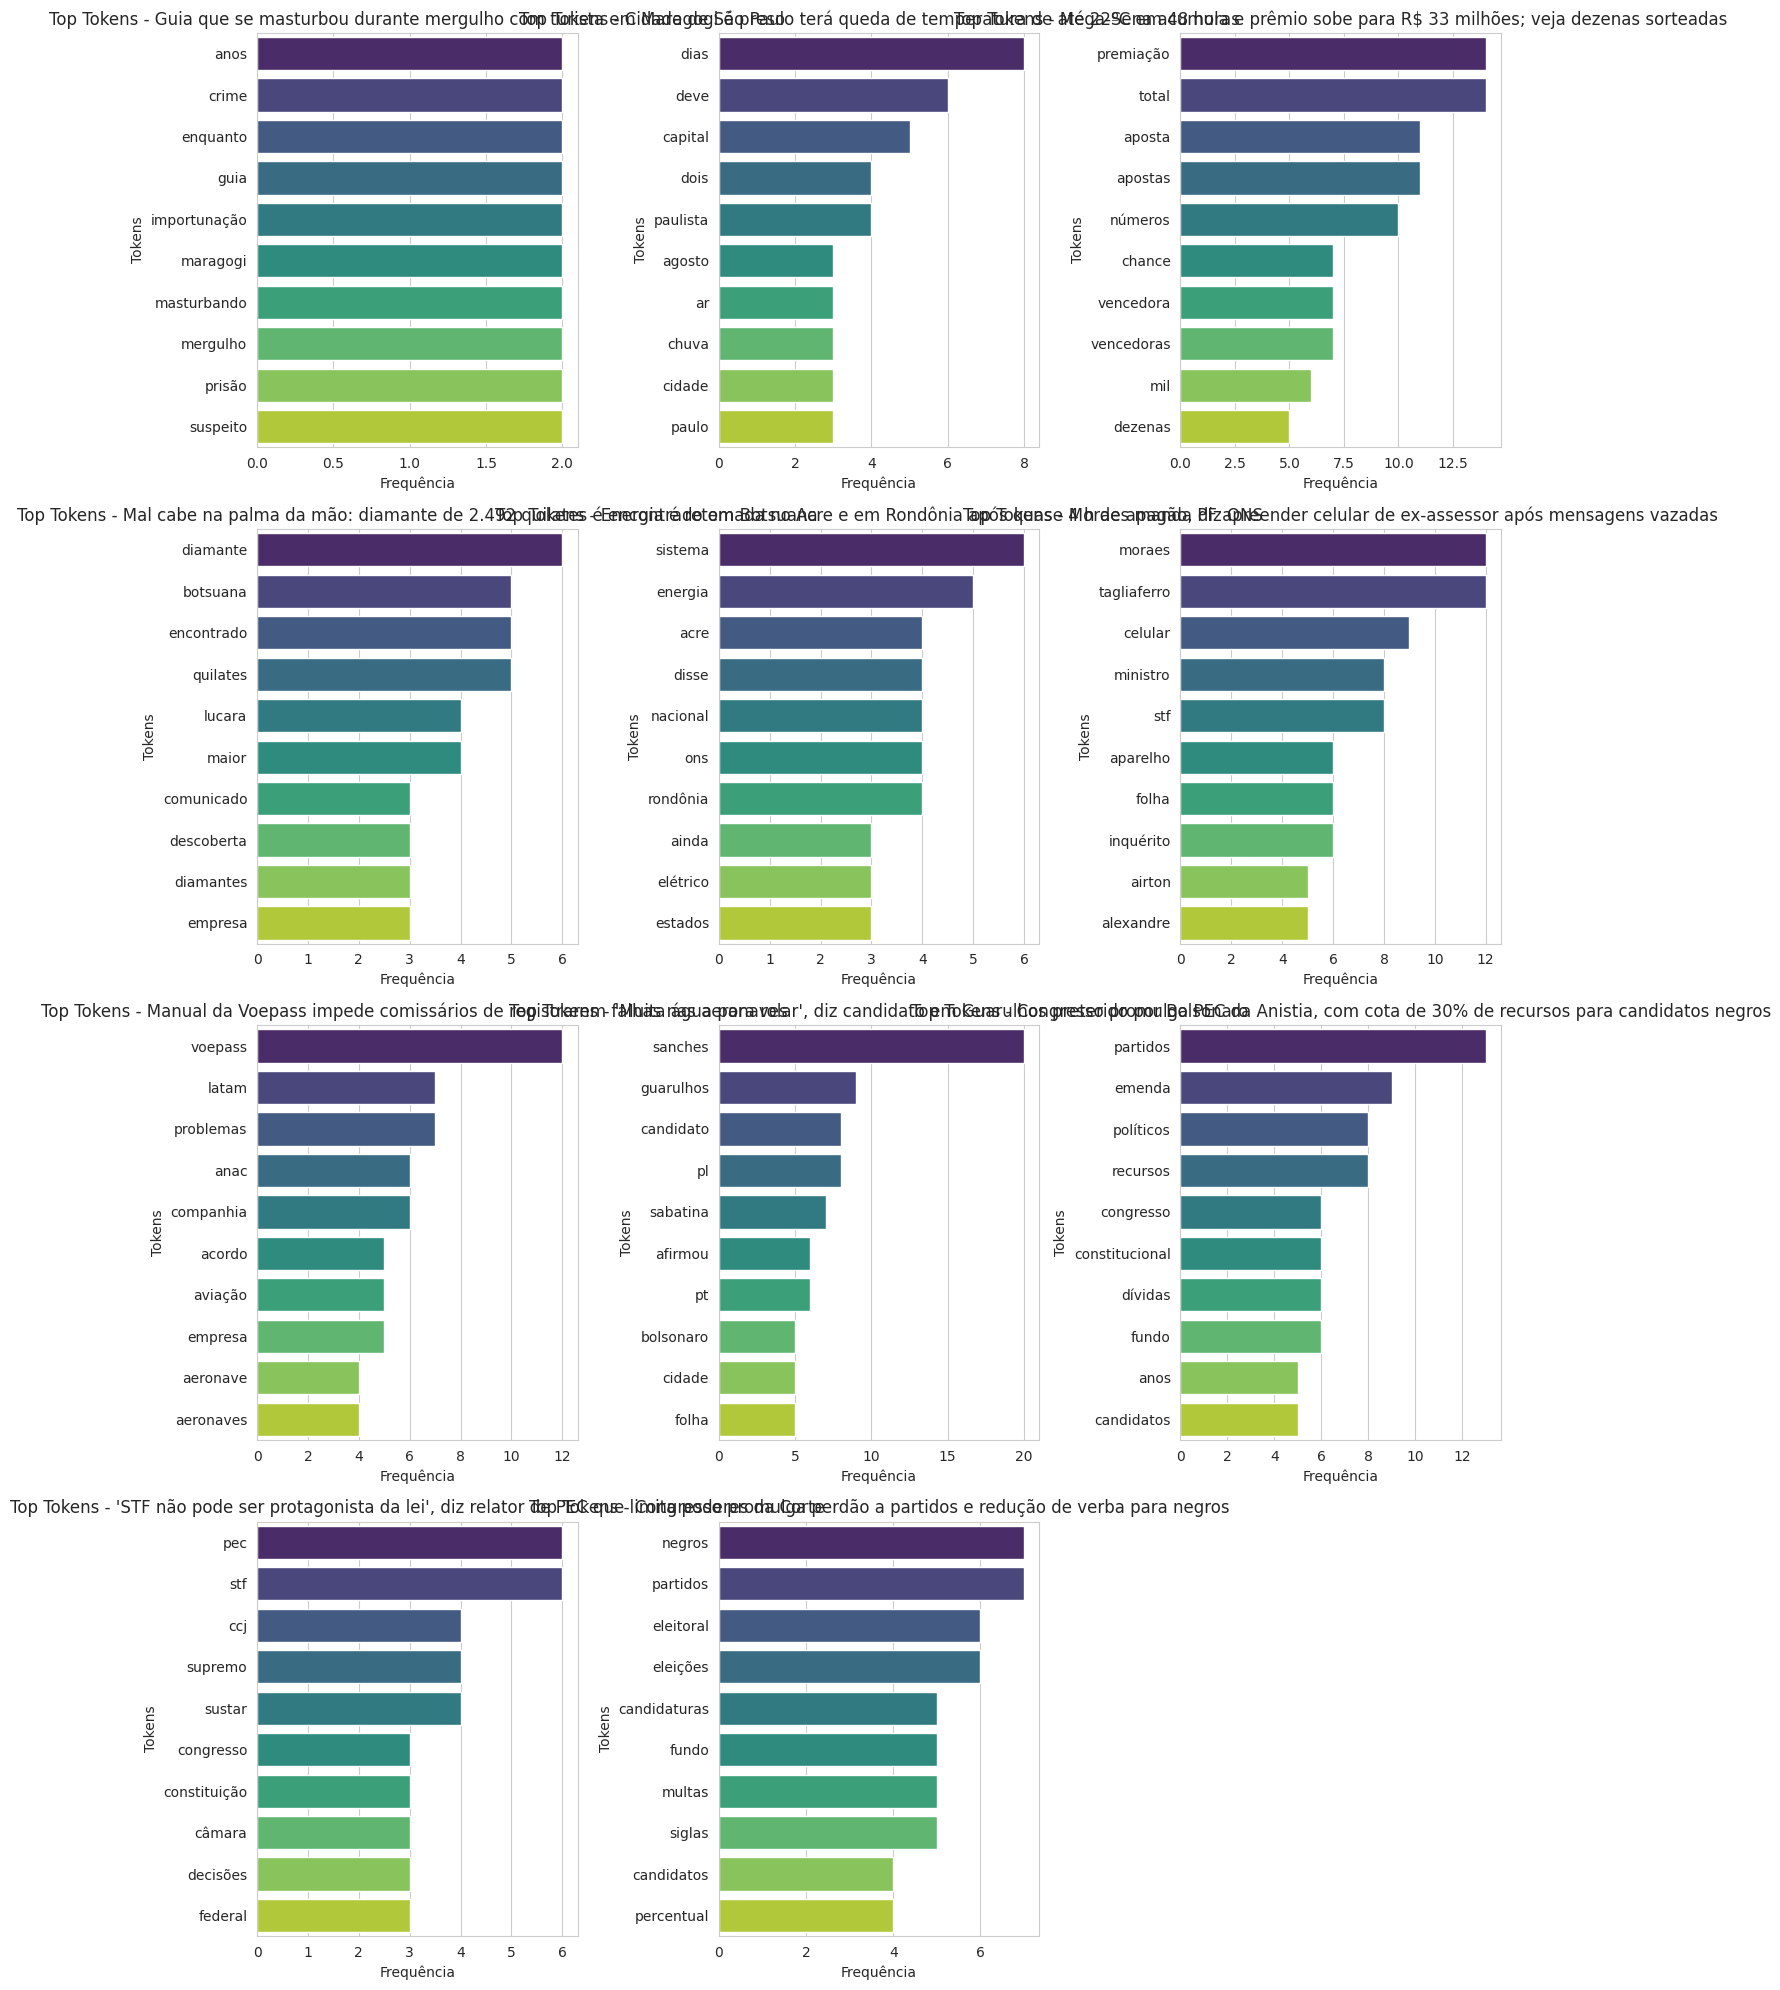

In [79]:
def plot_top_tokens_small_multiples(df_top_tokens, cols=3):
    """
    Cria visualizações de small multiples dos top tokens por documento, organizados em múltiplas colunas.

    Parameters:
    - df_top_tokens (pd.DataFrame): DataFrame com colunas 'documento', 'token' e 'frequencia'.
    - cols (int): Número de colunas na grid para os gráficos.
    """
    # Obter a lista única de documentos
    documentos = df_top_tokens['documento'].unique()
    num_documentos = len(documentos)

    # Determinar o número de linhas com base no número de documentos e colunas
    rows = math.ceil(num_documentos / cols)

    # Definir o tamanho da figura com base no número de documentos e colunas
    fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows), sharex=False, sharey=False)

    # Se houver apenas uma linha ou coluna, garantir que axes seja uma matriz bidimensional
    axes = axes.flatten() if num_documentos > 1 else [axes]

    # Loop através de cada documento e criar um gráfico individual
    for i, documento in enumerate(documentos):
        ax = axes[i]
        df_subset = df_top_tokens[df_top_tokens['documento'] == documento]

        # Criar o gráfico de barras para os top tokens
        sns.barplot(x='frequencia', y='token', data=df_subset, ax=ax, palette='viridis', hue='token', dodge=False)
        ax.set_title(f'Top Tokens - {documento}')
        ax.set_xlabel('Frequência')
        ax.set_ylabel('Tokens')

        # Verifica se a legenda foi criada antes de tentar removê-la
        if ax.legend_ is not None:
            ax.legend_.remove()

    # Remover eixos vazios, caso o número de documentos não preencha todas as posições
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Uso da função de plotagem com 2 colunas
plot_top_tokens_small_multiples(df_top_tokens, cols=3)



# Avançando...

O **TF-IDF (Term Frequency-Inverse Document Frequency)** é uma técnica fundamental no **Processamento de Linguagem Natural**, com várias aplicações. A essência do TF-IDF está em medir a importância relativa de uma palavra em um documento, levando em consideração sua ocorrência em um conjunto de documentos (*corpus*). A técnica se baseia em dois componentes principais:

- **TF (Term Frequency)**: Frequência de uma palavra em um documento específico.
- **IDF (Inverse Document Frequency)**: Importância de uma palavra em relação ao *corpus* inteiro, calculando a raridade dessa palavra. Palavras comuns em muitos documentos terão menor valor de IDF, enquanto palavras mais raras terão maior peso.


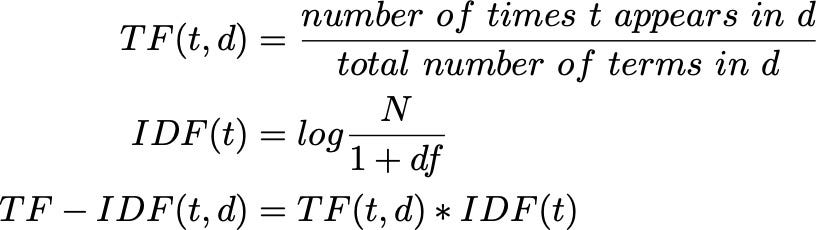



Para calcular a similaridade entre documentos utilizando o TF-IDF, uma das abordagens mais comuns é aplicar a **similaridade cosseno**. Essa métrica quantifica o alinhamento entre dois vetores (neste caso, os vetores TF-IDF de dois documentos) e retorna um valor entre -1 e 1. Quanto mais próximo de 1, maior a similaridade entre os documentos.

### Passos para calcular a similaridade:

Após gerar a matriz TF-IDF, é possível calcular a similaridade entre os vetores TF-IDF dos documentos usando a função `cosine_similarity` da biblioteca Scikit-learn.

### Interpretação dos valores de similaridade cosseno:

- **1**: Similaridade perfeita. Os vetores TF-IDF dos documentos estão completamente alinhados, indicando que os documentos são idênticos em termos dos termos ponderados.
- **0**: Nenhuma similaridade. Os vetores TF-IDF dos dois documentos são ortogonais, ou seja, não compartilham termos relevantes.
- **Valores negativos**: Indicariam oposição completa, mas no contexto de TF-IDF (que utiliza contagens não negativas), a similaridade cosseno geralmente varia de **0 a 1**.

### Considerações:

- **Escala dos documentos**: A similaridade cosseno é insensível ao tamanho dos documentos. Um documento pequeno e um grande podem ter alta similaridade se compartilharem termos importantes em comum.
- **Limitações semânticas**: A similaridade cosseno não considera relações semânticas entre palavras. Por exemplo, termos como "carro" e "veículo" são conceitualmente similares, mas se não forem exatamente os mesmos, a similaridade cosseno não irá reconhecê-los como tais.

In [80]:
# Passo 1: Instanciar o TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Passo 2: Ajustar e transformar os dados para obter a matriz TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(df['texto_processado'])

# Passo 3: Converter a matriz esparsa resultante para um DataFrame
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Definir a coluna 'documento' como índice do DataFrame
df_tfidf.index = df['documento']

# Exibir as primeiras linhas do DataFrame vetorizado com TF-IDF
df_tfidf

,16h47,18h30,19h,20h40,22ºc,23ºc,37ºc,5º,abastece,abastecer,...,época,êxtase,índice,órgão,órgãos,última,último,últimos,única,único
documento,,,,,,,,,,,,,,,,,,,,,
Guia que se masturbou durante mergulho com turista em Maragogi é preso,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096197
Cidade de São Paulo terá queda de temperatura de até 22ºC em 48 horas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.064237,0.000000,0.000000,0.064237,0.054908,0.054908,0.000000,0.000000
Mega-Sena acumula e prêmio sobe para R$ 33 milhões; veja dezenas sorteadas,0.000000,0.000000,0.031421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mal cabe na palma da mão: diamante de 2.492 quilates é encontrado em Botsuana,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.062201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Energia é retomada no Acre e em Rondônia após quase 4 h de apagão, diz ONS",0.057454,0.000000,0.000000,0.057454,0.057454,0.057454,0.114908,0.000000,0.057454,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Moraes manda PF apreender celular de ex-assessor após mensagens vazadas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028573,...,0.024424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Manual da Voepass impede comissários de registrarem falhas nas aeronaves,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.034349,0.034349,0.000000,0.000000,0.000000,0.000000,0.000000
"'Muita água para rolar', diz candidato em Guarulhos preterido por Bolsonaro",0.000000,0.025803,0.000000,0.000000,0.000000,0.000000,0.000000,0.025803,0.000000,0.000000,...,0.022055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Congresso promulga PEC da Anistia, com cota de 30% de recursos para candidatos negros",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027399,0.000000,0.000000,0.000000


In [81]:
# Passo 4: Calcular a similaridade cosseno entre os documentos
similaridade = cosine_similarity(X_tfidf)

# Passo 5: Converter a matriz de similaridade em um DataFrame para melhor visualização
df_similaridade = pd.DataFrame(similaridade, index=df['documento'], columns=df['documento'])

# Exibir a matriz de similaridade
df_similaridade


documento,Guia que se masturbou durante mergulho com turista em Maragogi é preso,Cidade de São Paulo terá queda de temperatura de até 22ºC em 48 horas,Mega-Sena acumula e prêmio sobe para R$ 33 milhões; veja dezenas sorteadas,Mal cabe na palma da mão: diamante de 2.492 quilates é encontrado em Botsuana,"Energia é retomada no Acre e em Rondônia após quase 4 h de apagão, diz ONS",Moraes manda PF apreender celular de ex-assessor após mensagens vazadas,Manual da Voepass impede comissários de registrarem falhas nas aeronaves,"'Muita água para rolar', diz candidato em Guarulhos preterido por Bolsonaro","Congresso promulga PEC da Anistia, com cota de 30% de recursos para candidatos negros","'STF não pode ser protagonista da lei', diz relator de PEC que limita poderes da Corte",Congresso promulga perdão a partidos e redução de verba para negros
documento,,,,,,,,,,,
Guia que se masturbou durante mergulho com turista em Maragogi é preso,1.000000,0.032386,0.000643,0.002201,0.020451,0.022965,0.012739,0.017536,0.015780,0.014600,0.017476
Cidade de São Paulo terá queda de temperatura de até 22ºC em 48 horas,0.032386,1.000000,0.009635,0.004389,0.036350,0.027581,0.016874,0.068949,0.048661,0.019775,0.026855
Mega-Sena acumula e prêmio sobe para R$ 33 milhões; veja dezenas sorteadas,0.000643,0.009635,1.000000,0.011886,0.026643,0.008098,0.008068,0.009725,0.026421,0.005776,0.051919
Mal cabe na palma da mão: diamante de 2.492 quilates é encontrado em Botsuana,0.002201,0.004389,0.011886,1.000000,0.012759,0.010225,0.032573,0.019623,0.036762,0.014516,0.026457
"Energia é retomada no Acre e em Rondônia após quase 4 h de apagão, diz ONS",0.020451,0.036350,0.026643,0.012759,1.000000,0.043907,0.034579,0.032471,0.022715,0.020499,0.009889
Moraes manda PF apreender celular de ex-assessor após mensagens vazadas,0.022965,0.027581,0.008098,0.010225,0.043907,1.000000,0.023921,0.051574,0.044868,0.110883,0.022573
Manual da Voepass impede comissários de registrarem falhas nas aeronaves,0.012739,0.016874,0.008068,0.032573,0.034579,0.023921,1.000000,0.030927,0.033743,0.019564,0.014264
"'Muita água para rolar', diz candidato em Guarulhos preterido por Bolsonaro",0.017536,0.068949,0.009725,0.019623,0.032471,0.051574,0.030927,1.000000,0.048578,0.036371,0.068604
"Congresso promulga PEC da Anistia, com cota de 30% de recursos para candidatos negros",0.015780,0.048661,0.026421,0.036762,0.022715,0.044868,0.033743,0.048578,1.000000,0.148620,0.515908


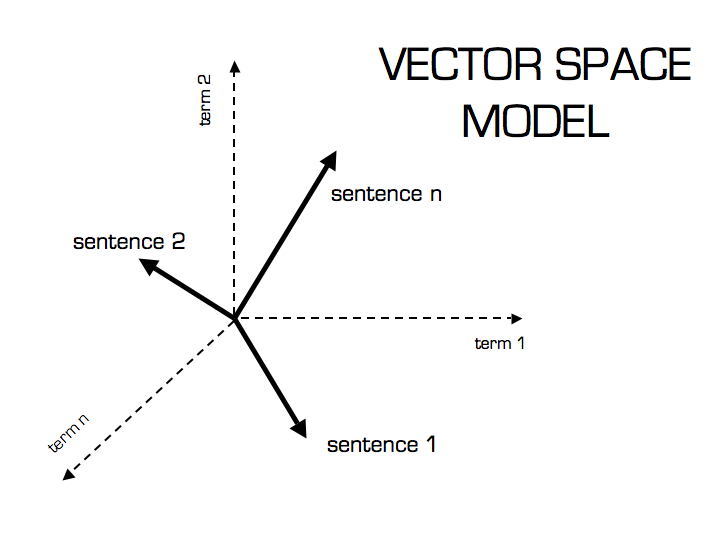

O código abaixo cria uma visualização gráfica da similaridade entre documentos utilizando um **heatmap** (mapa de calor). Este gráfico é útil para representar a matriz de similaridade cosseno calculada a partir da matriz TF-IDF.

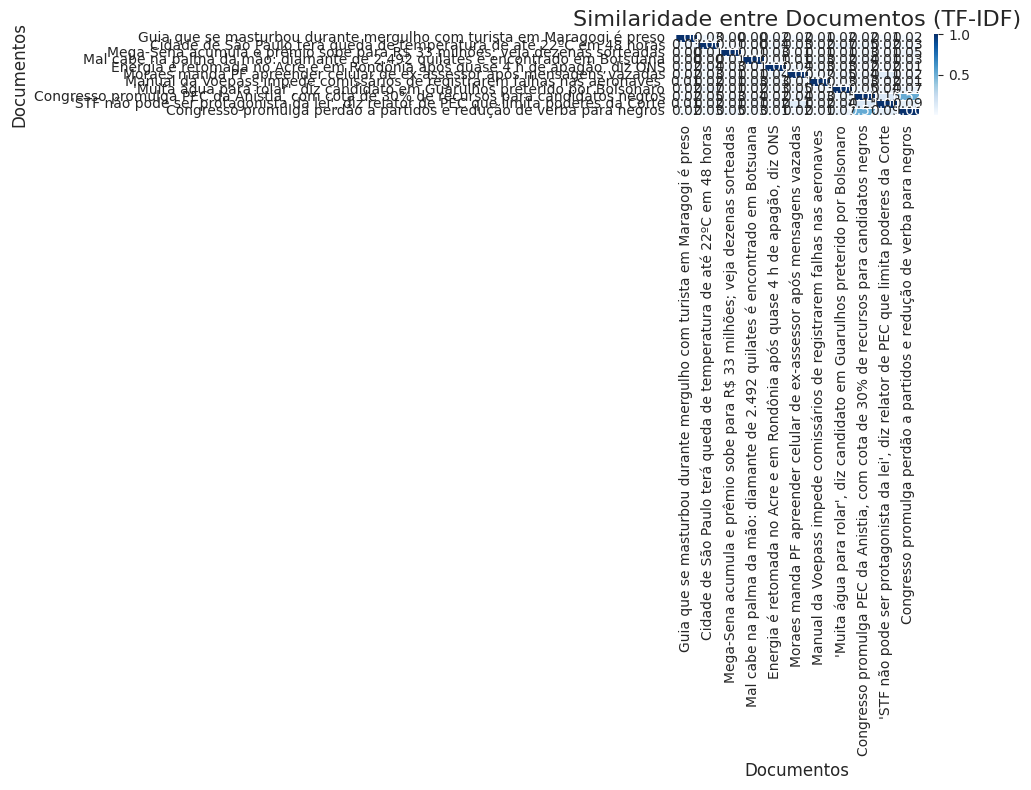

In [82]:

# Ajustar o tamanho da figura
plt.figure(figsize=(10, 8))

# Criar o heatmap usando seaborn
sns.heatmap(df_similaridade, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)

# Ajustes de título e rótulos
plt.title('Similaridade entre Documentos (TF-IDF)', fontsize=16)
plt.xlabel('Documentos', fontsize=12)
plt.ylabel('Documentos', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()
